## 数据分析要求

### 一、数据摘要和可视化

#### - 数据摘要
      
      1. 标称属性，给出每个可能取值的频数
      
      2. 数值属性，给出5数概括及缺失值的个数
      
#### - 数据可视化

      使用直方图、盒图等检查数据分布及离群点
      
      
### 二、数据缺失的处理

#### - 观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
    
    1. 将缺失部分剔除
    
    2. 用最高频率值来填补缺失值
    
    3. 通过属性的相关关系来填补缺失值
    
    4.通过数据对象之间的相似性来填补缺失值

#### 注意：在处理后完成，要对比新旧数据集的差异。

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

github_data = pd.read_csv('/kaggle/input/github-dataset/repository_data.csv')

github_data.head(5)

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"['TypeScript', 'JavaScript', 'CSS', 'Shell', '...",32231.0,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,NaN,NaN,3189.0,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,NaN,NaN,8286.0,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,NaN,NaN,2314.0,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,NaN,NaN,1074.0,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal


## 1. Data Details  -- Github Dataset

### Columns

`name` - the name of the repository

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`watchers` - watchers in the repository

`pull_requests` - pull requests opened in the repository

`primary_language` - the primary language of the repository

`languages_used` - list of all the languages used in the repository

`commit_count` - commits made in the repository

`created_at`  - time and date when the repository was created

`license` - license assigned to the repository



In [ ]:
github_data.dtypes

name                 object
stars_count           int64
forks_count           int64
watchers              int64
pull_requests         int64
primary_language     object
languages_used       object
commit_count        float64
created_at           object
licence              object
dtype: object

### Nominal Attributes

`primary_language` - the primary language of the repository

`languages_used` - list of all the languages used in the repository

`license` - license assigned to the repository

#### *Frequency -- `primary_language`*

In [ ]:
count_primary_language_top50 = github_data['primary_language'].value_counts()[0:50]
count_primary_language_top50

JavaScript          451954
Python              451473
Java                202394
C++                 150066
PHP                 116058
TypeScript          114813
C                   111473
C#                  108625
Go                   93236
HTML                 93140
Shell                83175
Jupyter Notebook     80904
Ruby                 66973
CSS                  44337
Objective-C          44270
Rust                 40319
Swift                40045
Kotlin               29238
Dart                 25431
R                    23778
Vue                  22179
Lua                  20097
MATLAB               17687
Scala                14246
Haskell              11525
TeX                  11314
PowerShell           10599
Perl                 10258
Clojure               9842
Vim Script            9754
Dockerfile            9382
Makefile              7701
Elixir                7647
Emacs Lisp            7580
CoffeeScript          7115
Julia                 6976
HCL                   5857
A

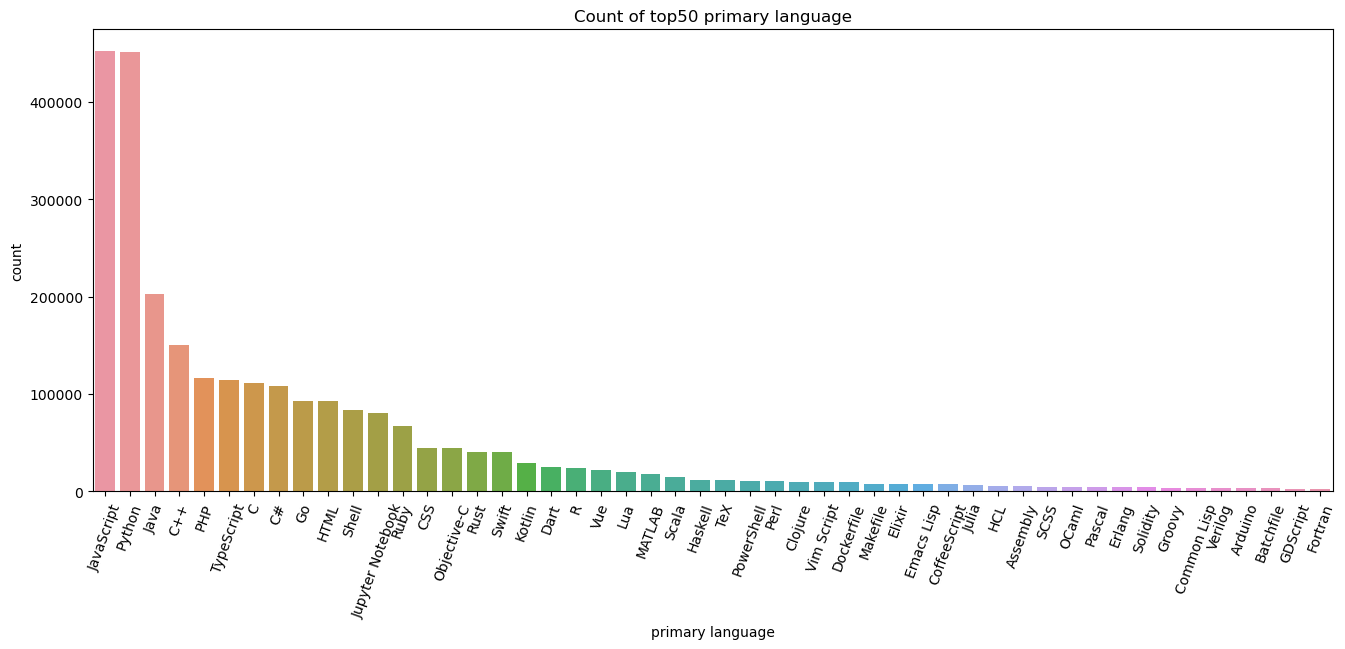

In [ ]:
count_primary_language = github_data['primary_language'].value_counts()
count_primary_language_top50 = github_data['primary_language'].value_counts()[0:50]
plt.figure(figsize=(16,6))
sns.barplot(y=count_primary_language_top50.values, x=count_primary_language_top50.index)
plt.title("Count of top50 primary language")
plt.xlabel("primary language")
plt.xticks(rotation=70)
plt.ylabel("count")
plt.show()

#### *Frequency -- `language_used`*

In [ ]:
import ast
github_data['languages_used'].fillna("['None']",inplace=True)
github_data['languages_used']= github_data['languages_used'].apply(ast.literal_eval)
github_data_languages_used = github_data['languages_used']
exploded_languages_used = github_data_languages_used.explode('languages_used')
count_languages_used  = exploded_languages_used.value_counts()
count_languages_used_top50 = count_languages_used[0:50]
count_languages_used_top50

JavaScript          828559
Python              686604
HTML                594732
Shell               580840
CSS                 464495
Java                275901
C++                 273428
C                   272548
Makefile            255521
None                221984
Ruby                161779
PHP                 161232
TypeScript          160398
Dockerfile          147296
C#                  135325
Objective-C         127795
Go                  110265
Jupyter Notebook    104514
CMake                84011
Batchfile            80090
Swift                66624
SCSS                 57808
Kotlin               55839
Vue                  51059
Perl                 48233
Rust                 48123
R                    42386
Assembly             41072
Lua                  37050
PowerShell           33304
MATLAB               33022
TeX                  32040
Dart                 29297
CoffeeScript         21182
Scala                20964
Vim Script           19292
Roff                 18463
G

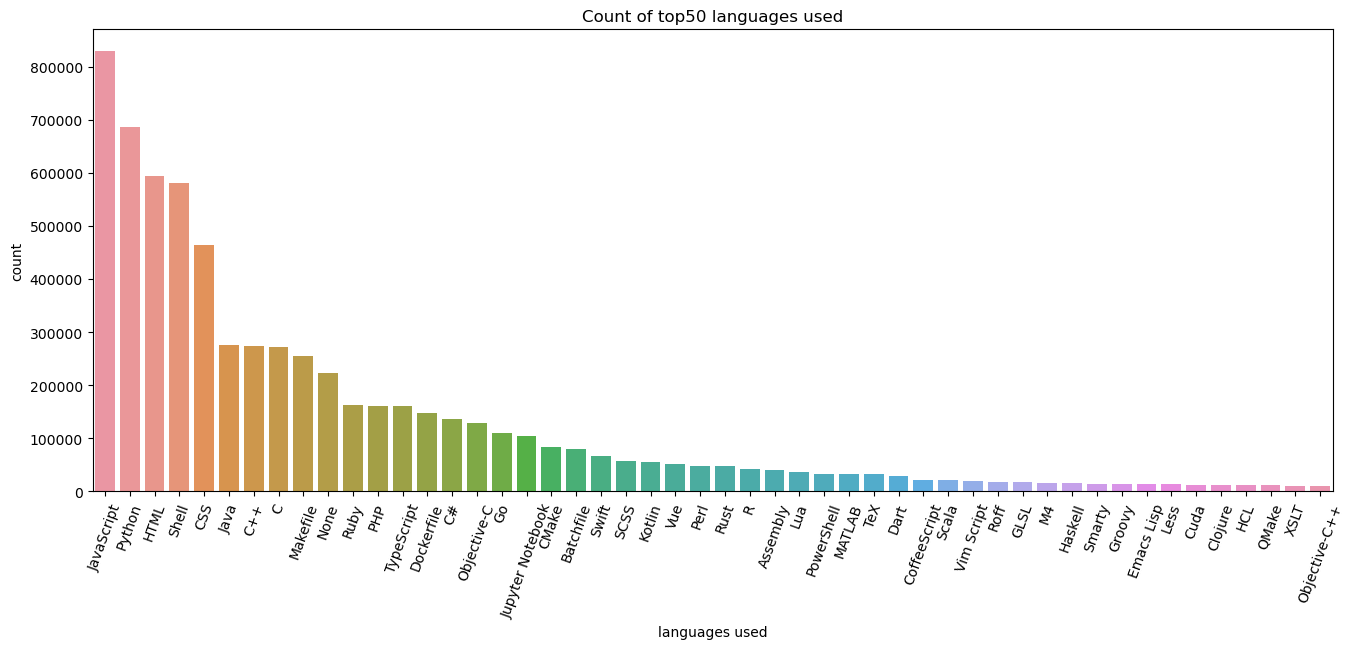

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(y=count_languages_used_top50.values, x=count_languages_used_top50.index)
plt.title("Count of top50 languages used")
plt.xlabel("languages used")
plt.xticks(rotation=70)
plt.ylabel("count")
plt.show()

#### *Frequency -- `license`*

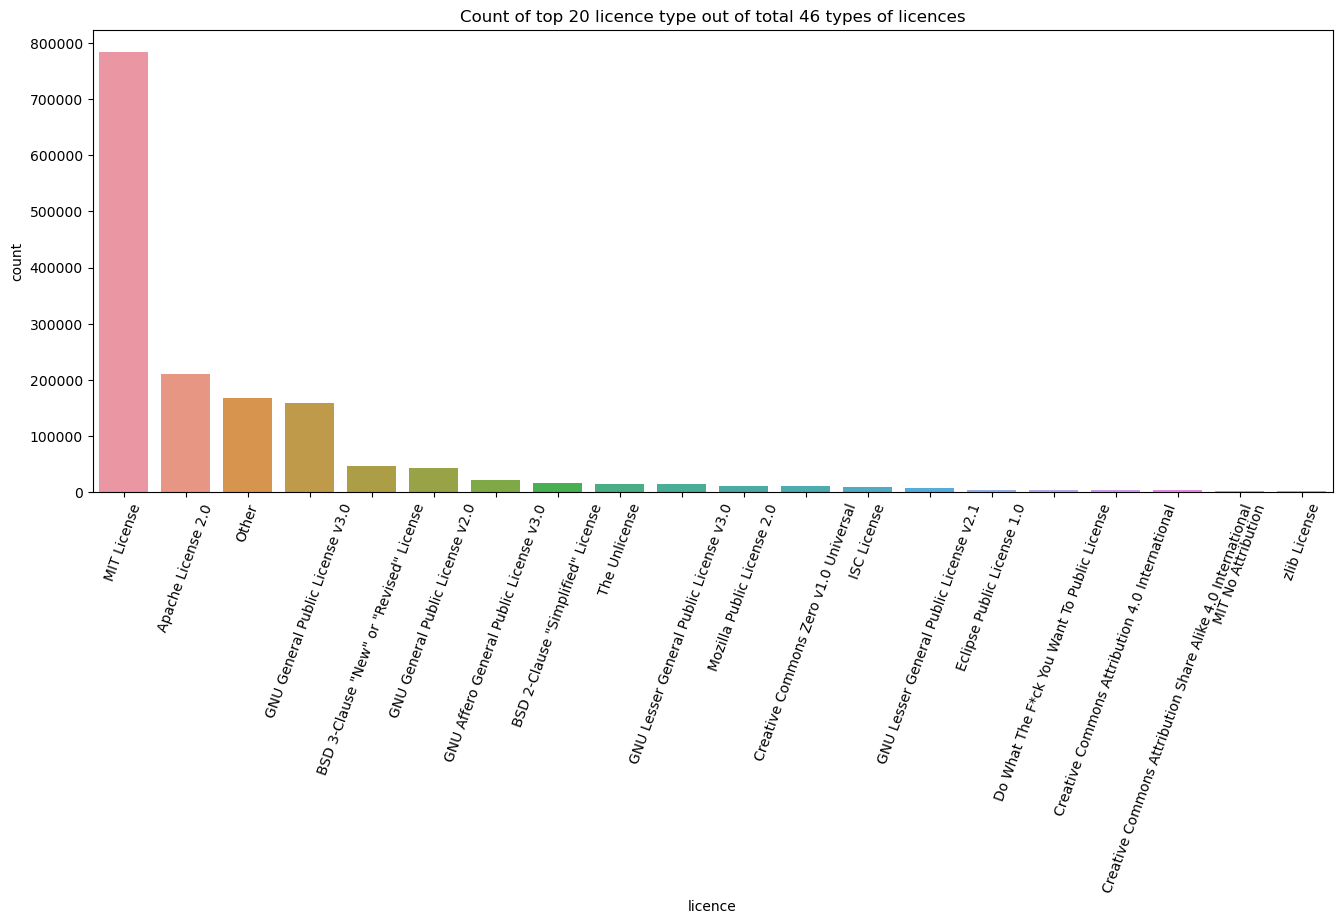

In [ ]:
count_licence = github_data['licence'].value_counts()
count_licence_top10 = github_data['licence'].value_counts()[0:20]
plt.figure(figsize=(16,6))
sns.barplot(y=count_licence_top10.values, x=count_licence_top10.index)
plt.title("Count of top 20 licence type out of total 46 types of licences")
plt.xlabel("licence")
plt.xticks(rotation=70)
plt.ylabel("count")
plt.show()

### Numeric Attributes

`stars_count` - stars count of the repository

`forks_count` - fork count of the repository

`watchers` - watchers in the repository

`pull_requests` - pull requests opened in the repository

`commit_count` - commits made in the repository


In [ ]:
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count'])
numeric_github_data.head()

,stars_count,forks_count,watchers,pull_requests,commit_count
0,359805,30814,8448,31867,32231.0
1,264811,21470,4298,1949,3189.0
2,262380,53302,9544,8235,8286.0
3,244927,65038,8539,867,2314.0
4,235223,24791,7446,1859,1074.0


#### *Five Number Summary -- `stars_count`, `forks_count`, `watchers`, `pull_requests`, `commit_count`*

In [ ]:
numeric_describe = numeric_github_data.describe()
numeric_describe.loc[['mean', '25%', '50%', '75%', 'max']]

,stars_count,forks_count,watchers,pull_requests,commit_count
mean,76.41027,20.947142,7.135321,24.306485,6.143709e+02
25%,7.00000,1.000000,2.000000,0.000000,9.000000e+00
50%,12.00000,4.000000,3.000000,1.000000,2.700000e+01
75%,30.00000,11.000000,6.000000,6.000000,8.900000e+01
max,359805.00000,242208.000000,9544.000000,301585.000000,4.314502e+06


In [ ]:
numeric_github_data.dropna(inplace=True)
numeric_github_data['commit_count'] = numeric_github_data['commit_count'].astype(int)

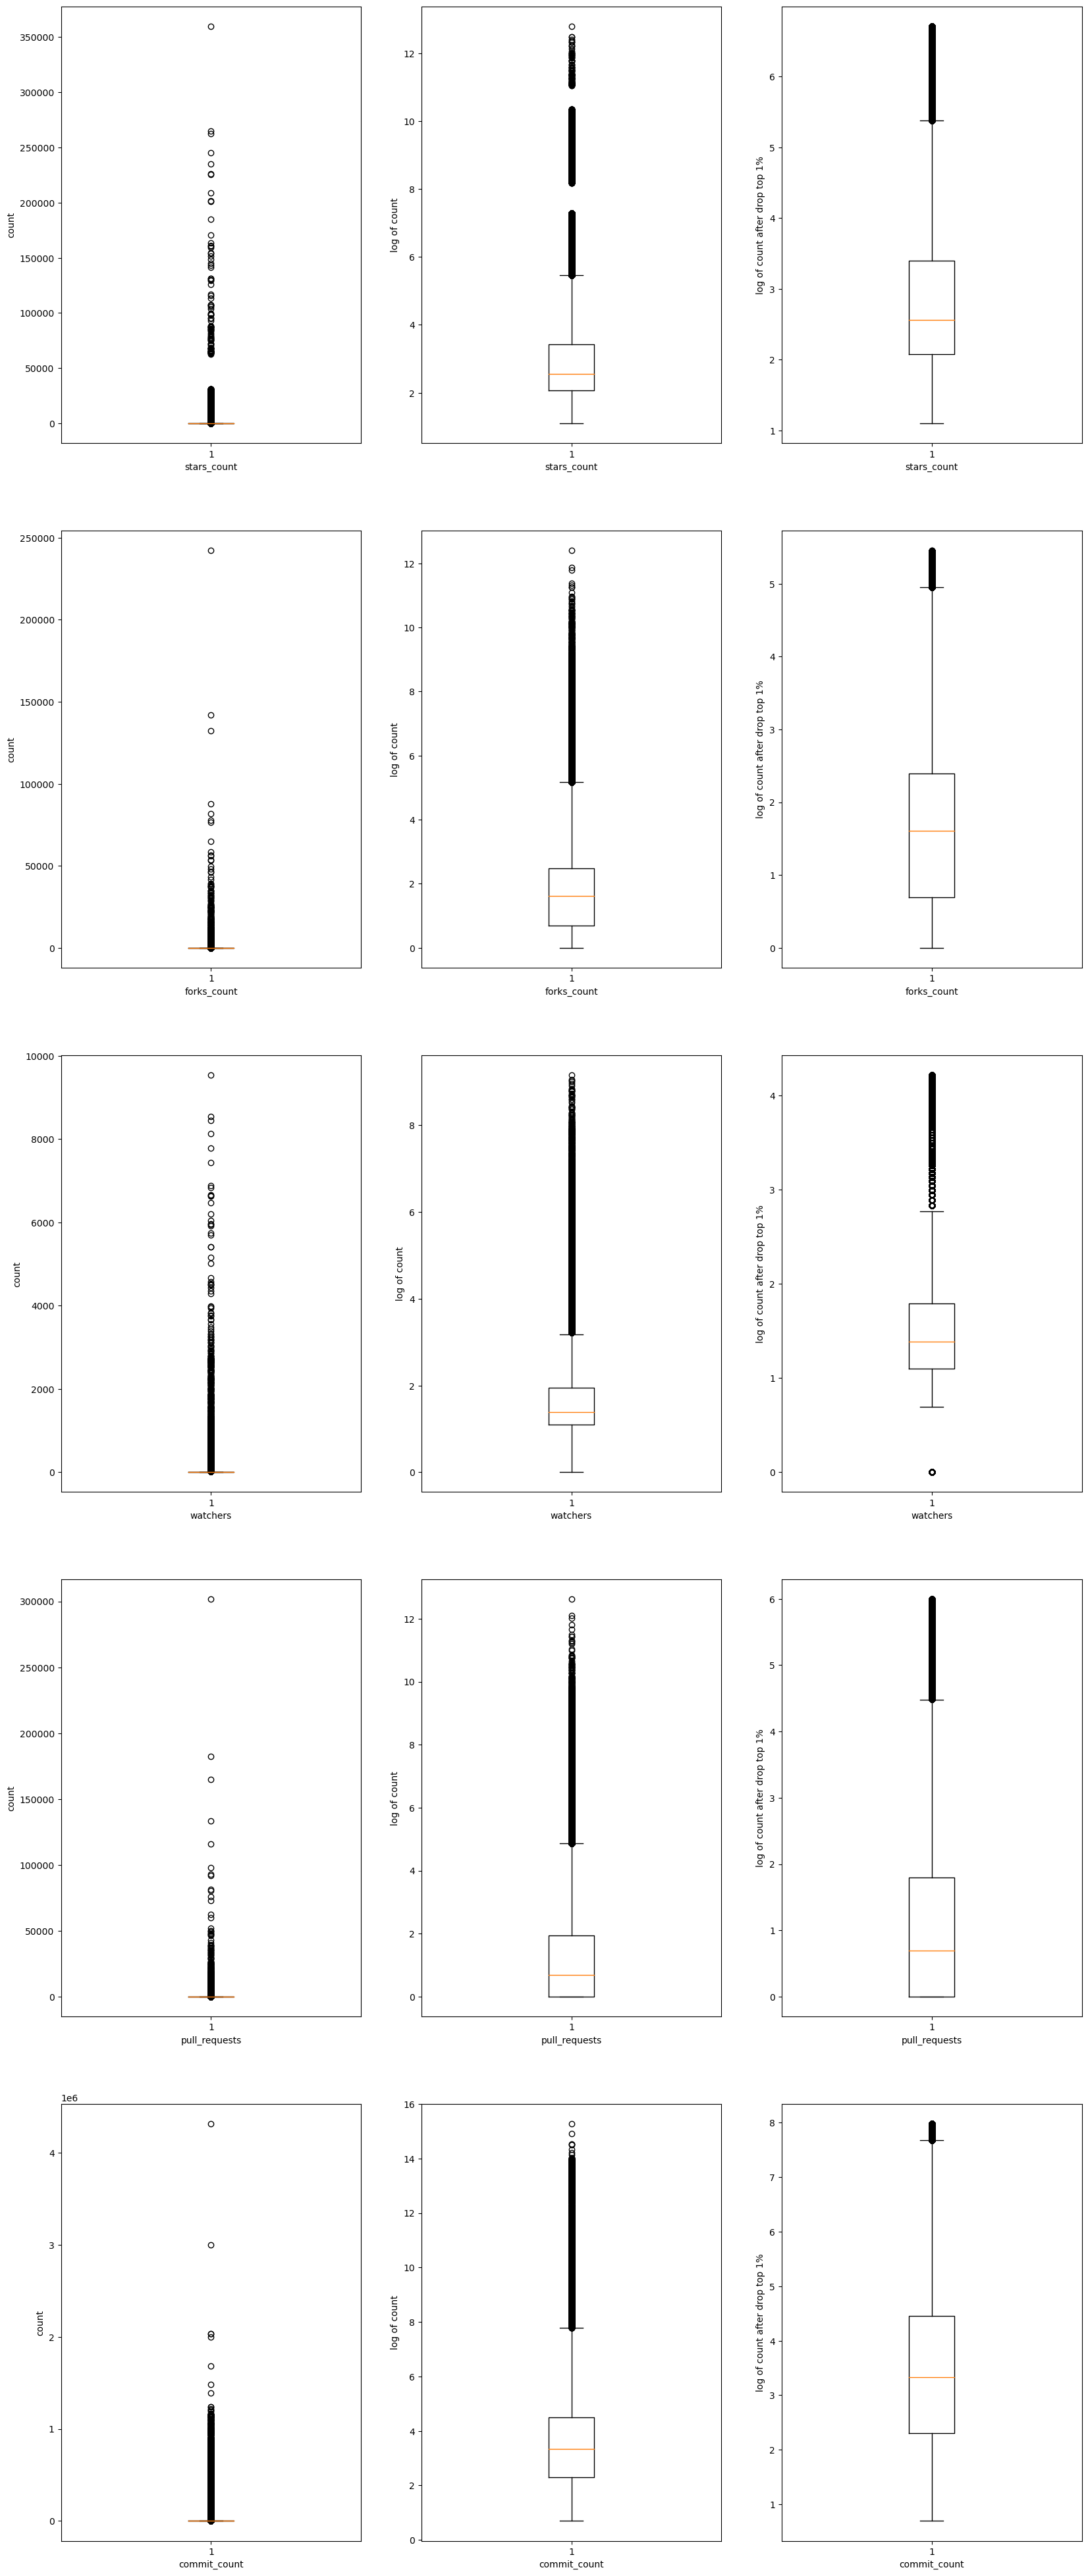

In [ ]:
count = numeric_github_data.shape[0]
plt.figure(figsize=(20, 50))
for i in range(len(numeric_github_data.columns)):
    col = numeric_github_data.columns[i]
    plt.subplot(5, 3, 3*i+1)
    plt.boxplot((numeric_github_data[col]))
    plt.xlabel(col)
    plt.ylabel("count")

    plt.subplot(5, 3, 3*i+2)
    plt.boxplot(np.log1p(numeric_github_data[col]))
    plt.xlabel(col)
    plt.ylabel("log of count")

    plt.subplot(5, 3, 3*i+3)
    new_data = sorted(numeric_github_data[col])[0:round(count*0.99)]
    plt.boxplot(np.log1p(new_data))
    plt.xlabel(col)
    plt.ylabel("log of count after drop top 1%")


#### *Missing Value Count*

In [ ]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts['languages_used'] = count_languages_used_top50['None']
NaN_counts

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
NaN_counts,12,0,0,0,0,218573,221984,1921,0,1378200


In [ ]:
sns.set_style("whitegrid")
github_data_primmary_languages = github_data[['primary_language','stars_count', 'forks_count', 'watchers', 'pull_requests',
       'commit_count']]
github_data_primmary_languages.dropna(inplace=True)
github_data_primmary_languages['commit_count'] = github_data_primmary_languages['commit_count'].astype(int)

In [ ]:
language_list = count_primary_language_top50.index
github_data_primmary_languages_idx = github_data_primmary_languages['primary_language'].isin(language_list)
github_data_pl_top50 = github_data_primmary_languages[github_data_primmary_languages_idx]

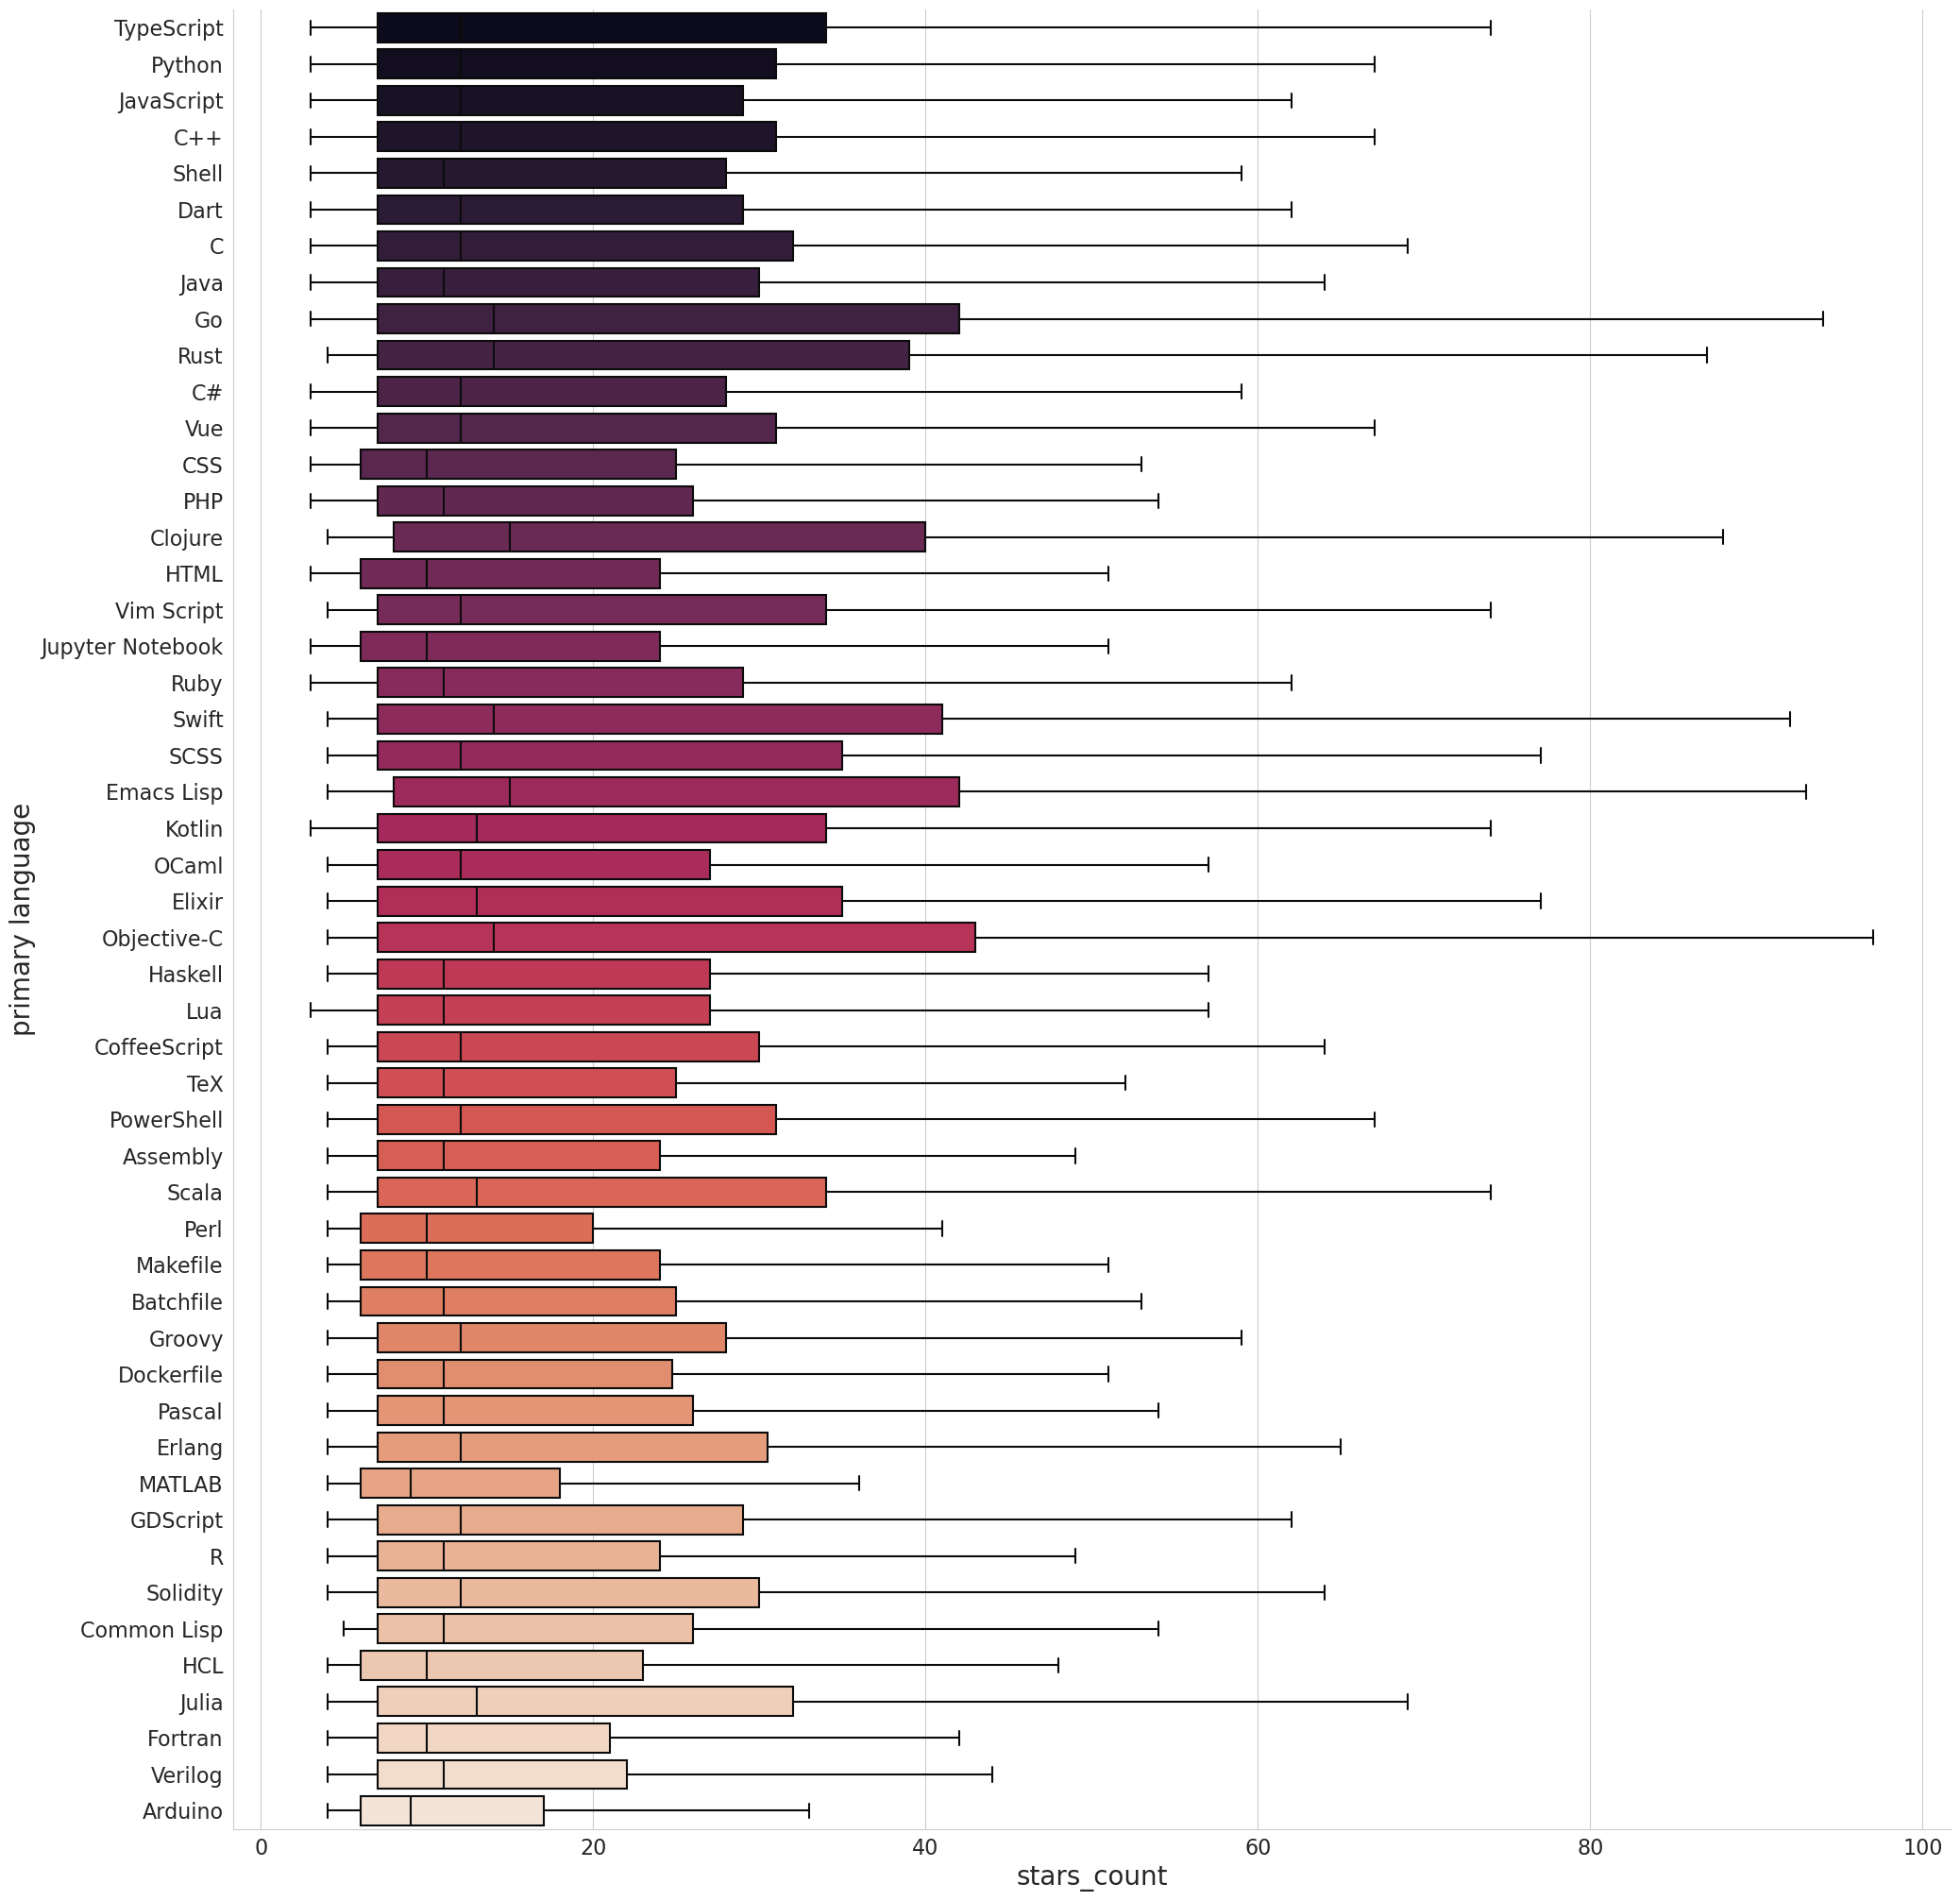

In [ ]:
stars_count_box = sns.catplot(data=github_data_pl_top50, kind='box', y='primary_language', x='stars_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('primary language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

## 2. Dealing With NaN

### NaN Analysis

以primary_language列为例，其的缺乏可能是由于目录下并非某一种编程语言，可能是图书分享等文件形式，因此这一列为缺失状态，对结果的影响并不大，下面依据多种方法处理这一列的缺失数据。

    1. 将缺失部分剔除
    
    2. 用最高频率值来填补缺失值
    
    3. 通过属性的相关关系来填补缺失值
    
    4.通过数据对象之间的相似性来填补缺失值
    

### 将缺失部分剔除

数据集比较：数据集由2917951条减少至2699378条

In [ ]:
from numpy import nan as NA

In [ ]:
# Delete rows containing NaN
github_data_cleaned = github_data.dropna(subset = ['primary_language'])
delete_num = github_data.shape[0] - github_data_cleaned.shape[0]
github_data_cleaned
print('delete_num: ',delete_num)

delete_num:  218573


### 用最高频率值来填补缺失值

数据集比较：使用最高频的语言替换空缺值，使得该语言的频率发生变化。

In [ ]:
language_HF = github_data['primary_language'].value_counts().index[0]
print('{} is the language with the highest frequency.'.format(language_HF))

JavaScript is the language with the highest frequency.


In [ ]:
github_data_HF_replaced = github_data
github_data_HF_replaced['primary_language'] = github_data_HF_replaced['primary_language'].replace(np.nan, language_HF)
github_data_HF_replaced

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"[TypeScript, JavaScript, CSS, Shell, Dockerfil...",32231.0,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,JavaScript,[None],3189.0,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,JavaScript,[None],8286.0,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,JavaScript,[None],2314.0,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,JavaScript,[None],1074.0,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal
...,...,...,...,...,...,...,...,...,...,...
2917946,FastledServer,6,1,1,0,HTML,"[HTML, C++, TypeScript, JavaScript]",3.0,2022-01-24T00:33:33Z,NaN
2917947,zero-motorcycle-canbus,6,3,2,0,C++,"[C++, C]",3.0,2022-01-23T21:51:51Z,MIT License
2917948,common-object-management-service,6,7,6,99,JavaScript,"[JavaScript, Smarty, Dockerfile]",504.0,2022-01-26T19:08:25Z,Apache License 2.0
2917949,MSI-Z690-Carbon-i7-12700KF-Hackintosh,6,5,1,0,JavaScript,[None],1.0,2022-01-24T03:27:16Z,NaN


### 通过属性的相关关系来填补缺失值

可以计算相关性矩阵，但是language较多，独热编码后维度扩增剧烈，且直接求相关性由于数据量受到内存限制，可以对数据抽样做相关性，但是相关性较弱，分析也认为不具有实际意义，不建议本方法处理

### 通过数据对象之间的相似性来填补缺失值

与上一方法类似，分析认为实际意义较弱，不建议本方法处理